In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

%matplotlib inline

Using TensorFlow backend.


In [2]:
df = pd.read_csv("../4x4matrix.csv", index_col=0)

/Users/shimotori/.pyenv/versions/anaconda3-5.3.0/lib/python3.6/site-packages/numpy/lib/arraysetops.py:522: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
df[df.iloc[:,16] <= 1] = 0
df[df >= 2] = 1
df.head(5)

,p_11,p_12,p_13,p_14,p_21,p_22,p_23,p_24,p_31,p_32,...,p_44,q_11,q_12,q_13,q_21,q_22,q_23,q_31,q_32,q_33
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
class AE():
    def __init__(self,input_data_path="../4x4matrix.csv", optimizer='rmsprop', loss='mean_squared_error'):
        #self.p_matrix = np.array(pd.read_csv(input_data_path, index_col=0).iloc[:,0:16])
        #self.q_matrix = np.array(pd.read_csv(input_data_path, index_col=0).iloc[:,16:])
        self.p_matrix = np.array(df.iloc[:,0:16])
        self.q_matrix = np.array(df.iloc[:,16:])
        self.optimizer = optimizer
        self.model = Sequential()
        self.model.add( Dense(16, activation = 'relu', input_dim = 9) )
        #self.model.add( Dropout(0.2) )
        self.model.add( Dense(16, activation = keras.layers.ReLU(max_value=1, negative_slope=0, threshold = 0)) )
        self.model.compile(optimizer = 'rmsprop',
                           loss='mean_squared_error',
                           metrics = ['accuracy'])
        
    def fit(self, epochs='4', batch_size='256'):
        self.model.fit(self.q_matrix, self.p_matrix,
                      epochs = epochs,
                      batch_size = batch_size,
                      validation_data = (self.q_matrix, self.p_matrix))
    
    def predict(self, test_img):
        self.preds = self.model.predict(test_img).reshape(4,4)
        self.preds_binary = self.preds.copy()
        self.preds_binary[self.preds_binary < 0.5] = 0
        self.preds_binary[self.preds_binary >= 0.5] = 1
        print(self.preds, self.preds_binary)
        self.fig, self.axes = plt.subplots(nrows = 1, ncols = 3, figsize = (14,14))
        self.axes[0].imshow(test_img.reshape(3,3), cmap = plt.cm.binary)
        self.axes[0].set_title("original image")
        self.axes[1].imshow(self.preds, cmap = plt.cm.binary)
        self.axes[1].set_title("predicted image")
        self.axes[2].imshow(self.preds_binary, cmap = plt.cm.binary)
        self.axes[2].set_title("predicted image with binalization")

In [5]:
autoencoder = AE()

In [6]:
autoencoder.model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                160       
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
Total params: 432
Trainable params: 432
Non-trainable params: 0
_________________________________________________________________


In [7]:
autoencoder.fit(epochs = 15, batch_size=256)

Train on 1048576 samples, validate on 1048576 samples
Epoch 1/15
1048576/1048576 [==============================] - 9s 9us/step - loss: 0.0670 - acc: 0.4192 - val_loss: 0.0639 - val_acc: 0.0520
Epoch 2/15
1048576/1048576 [==============================] - 9s 8us/step - loss: 0.0638 - acc: 0.4526 - val_loss: 0.0637 - val_acc: 0.7875
Epoch 3/15
1048576/1048576 [==============================] - 9s 8us/step - loss: 0.0638 - acc: 0.5555 - val_loss: 0.0637 - val_acc: 0.8016
Epoch 4/15
1048576/1048576 [==============================] - 9s 8us/step - loss: 0.0624 - acc: 0.5364 - val_loss: 0.0552 - val_acc: 0.0079
Epoch 5/15
1048576/1048576 [==============================] - 9s 9us/step - loss: 0.0552 - acc: 0.5208 - val_loss: 0.0552 - val_acc: 0.7546
Epoch 6/15
1048576/1048576 [==============================] - 9s 8us/step - loss: 0.0552 - acc: 0.5896 - val_loss: 0.0551 - val_acc: 0.7560
Epoch 7/15
1048576/1048576 [==============================] - 9s 9us/step - loss: 0.0551 - acc: 0.6575 - v

[[0.70630544 0.7187162  0.5833425  0.567811  ]
 [0.7342024  0.80786425 0.71627516 0.59219253]
 [0.15745749 0.23799469 0.77917403 0.5598104 ]
 [0.18196201 0.17804572 0.63945    0.5393032 ]] [[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [0. 0. 1. 1.]
 [0. 0. 1. 1.]]


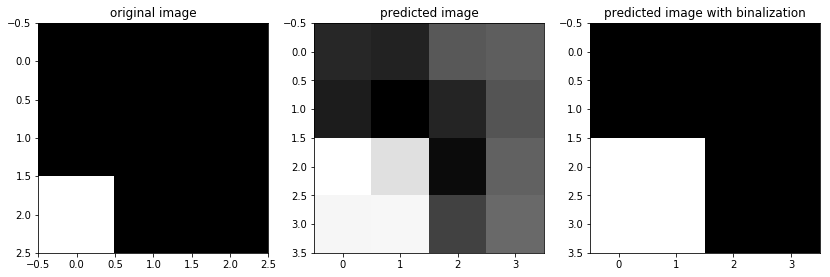

In [48]:
test_img = np.array([[1,1,1,1,1,1,0,1,1]])
autoencoder.predict(test_img)

In [44]:
autoencoder.preds_binary.reshape(1,16)

array([[1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.]],
      dtype=float32)

In [43]:
df[df.iloc[:,:16] == autoencoder.preds_binary.reshape(16,)]

,p_11,p_12,p_13,p_14,p_21,p_22,p_23,p_24,p_31,p_32,...,p_44,q_11,q_12,q_13,q_21,q_22,q_23,q_31,q_32,q_33
0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
